In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### K-Means
K-Means is a clustering algorithm that partitions data points into 'k' clusters, aiming to minimize the within-cluster variance. It iteratively assigns points to the nearest cluster centroid and updates centroids until convergence. By grouping similar data points together, it enables identifying underlying patterns in unlabeled data efficiently.

#### Elbow Method
The Elbow method is a technique used to determine the optimal number of clusters (k) in K-Means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and selecting the point where the rate of decrease in WCSS slows down, resembling an "elbow" shape. This point indicates a suitable number of clusters to use for the analysis.

#### K-Means Code along with elbow method

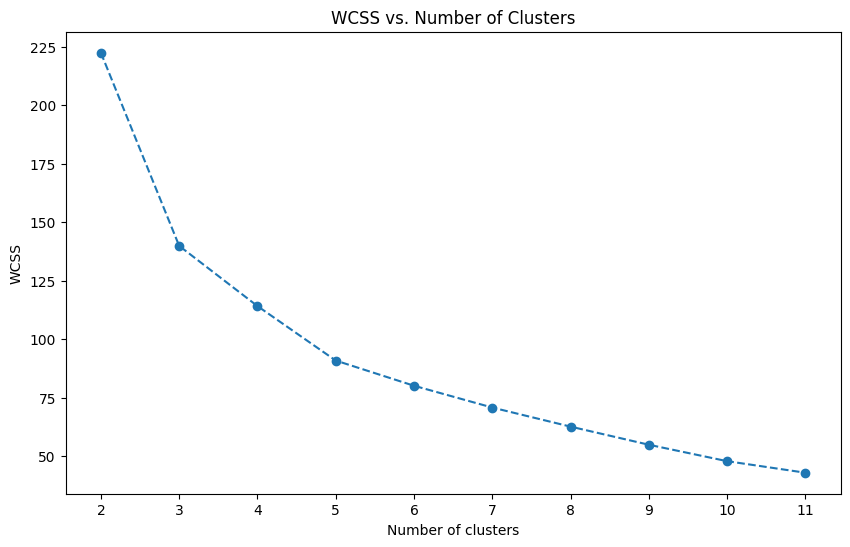

Cluster Centers:
 [[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]

Cluster Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


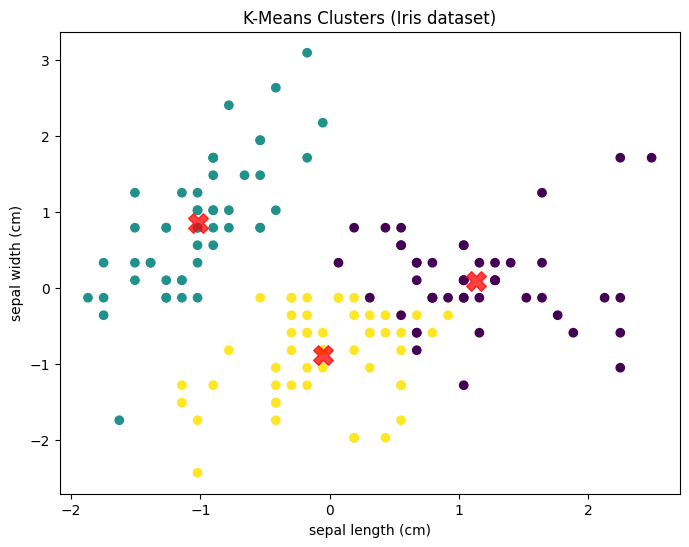

[[ 0 50  0]
 [11  0 39]
 [36  0 14]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.26      0.28      0.27        50

    accuracy                           0.09       150
   macro avg       0.09      0.09      0.09       150
weighted avg       0.09      0.09      0.09       150



In [2]:
# Import Libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Standardize the data as before
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(10, 6))
plt.plot(range(2, 12), wcss, marker='o', linestyle='--')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 12))
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Labels:\n", kmeans.labels_)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clusters (Iris dataset)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

# Kneed Code

In [3]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


The Elbow Point is at: 5


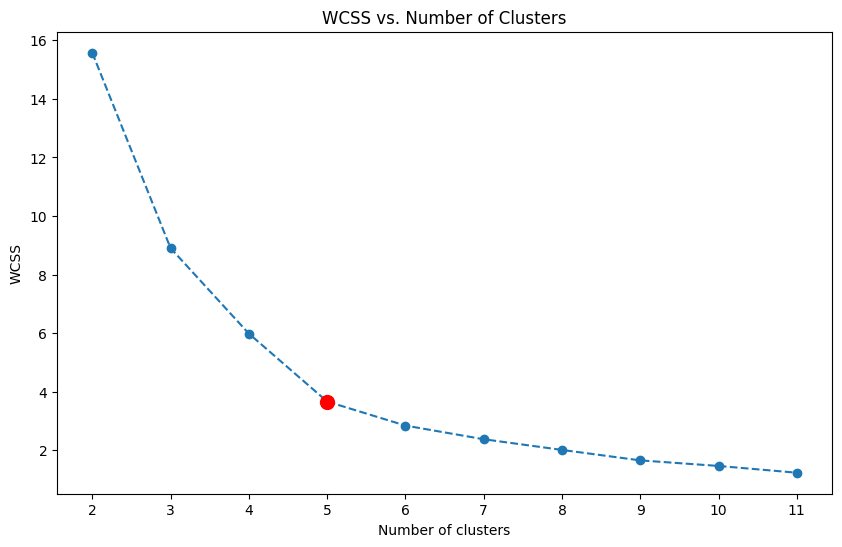

In [4]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
X = np.random.rand(100, 2)

# Perform K-Means clustering for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Use KneeLocator to find the elbow point
knee_locator = KneeLocator(range(2, 12), wcss, curve='convex', direction='decreasing')
print("The Elbow Point is at:", knee_locator.elbow)

# Optionally, plot the elbow point on the WCSS curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 12), wcss, marker='o', linestyle='--')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 12))

# Mark the elbow point
plt.scatter(knee_locator.elbow, wcss[knee_locator.elbow-2], color='red', s=100, zorder=5)
plt.show()